In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread

In [2]:
from denoising import PottsMH, IsingMH
from utils import discretise, kmeans_vq

In [3]:
lars = imread("data/lars.jpg")

### Plot of grayscale conversion and quantisation

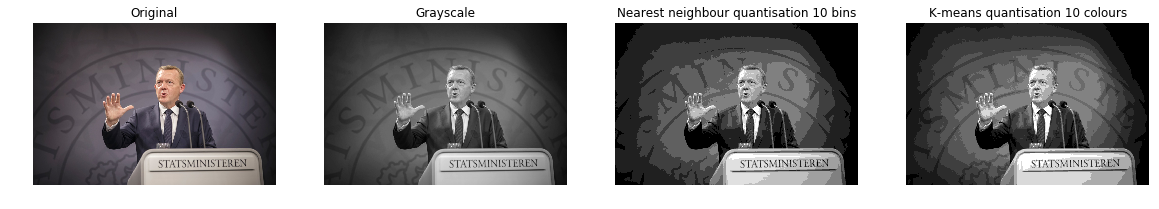

In [26]:
f, axarr = plt.subplots(1, 4, figsize=(20, 20))

axarr[0].imshow(lars)
axarr[0].set_title("Original")

axarr[1].imshow(np.mean(lars, 2), cmap="gray")
axarr[1].set_title("Grayscale")

axarr[2].imshow(discretise(np.mean(lars, 2)/255, 10), cmap="gray")
axarr[2].set_title("Nearest neighbour quantisation 10 bins")

axarr[3].imshow(kmeans_vq(np.mean(lars, 2)/255, 10), cmap="gray")
axarr[3].set_title("K-means quantisation 10 colours")

for i in range(4):
    axarr[i].axis('off')
    
plt.savefig("quantisation.png")

### Learning curve

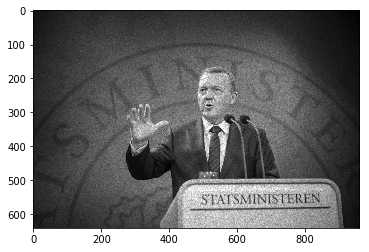

In [4]:
from skimage.util import random_noise

img = random_noise(np.mean(lars, 2)/255, "speckle")
plt.imshow(img, cmap="gray")

In [6]:
potts = PottsMH(img, beta=5, sigma=np.std(img), bins=10)

In [7]:
denoised = [potts.metropolisHastings2(80, discretise(img, 10)) for _ in range(100)]

In [8]:
history = np.array(potts.history())

In [9]:
from skimage.measure import compare_mse
mse = np.array([compare_mse(x, np.mean(lars, 2)/255) for x in history])

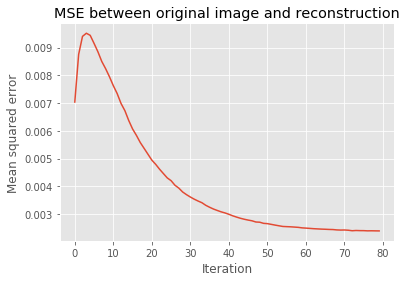

In [15]:
plt.style.use("ggplot")

plt.plot(mse)
plt.xlabel("Iteration")
plt.ylabel("Mean squared error")
plt.title("MSE between original image and reconstruction")

plt.savefig("MSE.pdf")

### MSE low

In [12]:
from utils import mode

compare_mse(np.mean(denoised, 0), np.mean(lars, 2)/255)

0.00084454365756730465

In [13]:
# Optimal value for MSE
compare_mse(discretise(img, 10), np.mean(lars, 2)/255)

0.0021938005621780529

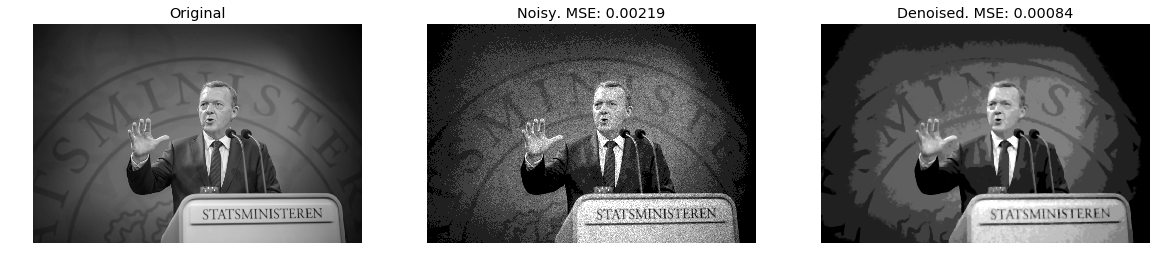

In [14]:
f, axarr = plt.subplots(1, 3, figsize=(20, 20))

original = np.mean(lars, 2)/255
noisy = discretise(img, 10)
reconstruction = np.mean(denoised, 0)

axarr[0].imshow(original, cmap="gray")
axarr[0].set_title("Original")

axarr[1].imshow(noisy, cmap="gray")
axarr[1].set_title("Noisy. MSE: {0:.5f}".format(compare_mse(noisy, original)))

axarr[2].imshow(reconstruction, cmap="gray")
axarr[2].set_title("Denoised. MSE: {0:.5f}".format(compare_mse(reconstruction, original)))

for i in range(3):
    axarr[i].grid(False)
    axarr[i].axis("off")
    
plt.show()

### Color image.

In [226]:
noisy_lars = random_noise(lars, "speckle", var=0.04)

In [203]:
r = noisy_lars[:, :, 0]
g = noisy_lars[:, :, 1]
b = noisy_lars[:, :, 2]

In [250]:
r_denoised = np.array([potts.metropolisHastings2(80, discretise(r, 20)) for _ in range(20)])
g_denoised = np.array([potts.metropolisHastings2(80, discretise(g, 20)) for _ in range(20)])
b_denoised = np.array([potts.metropolisHastings2(80, discretise(b, 20)) for _ in range(20)])

In [251]:
reconstruction = np.dstack([np.mean(r_denoised, 0),
                            np.mean(g_denoised, 0),
                            np.mean(b_denoised, 0)])

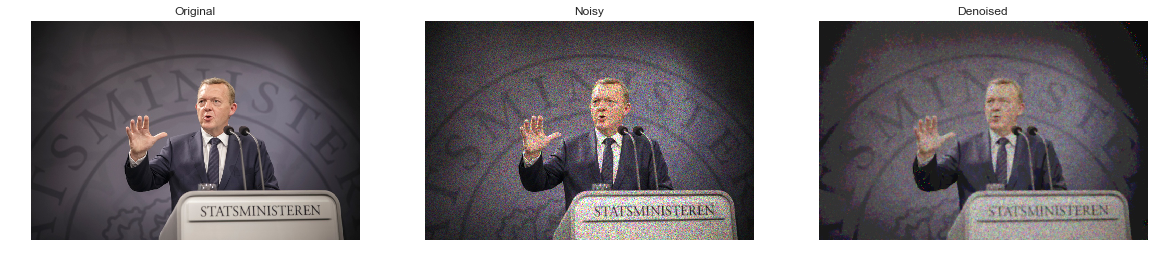

In [252]:
f, axarr = plt.subplots(1, 3, figsize=(20, 20))

axarr[0].imshow(lars)
axarr[0].set_title("Original")
axarr[1].imshow(noisy_lars)
axarr[1].set_title("Noisy")
axarr[2].imshow(reconstruction)
axarr[2].set_title("Denoised")

for i in range(3):
    axarr[i].grid(False)
    axarr[i].axis("off")
    
#plt.savefig("lars-denoised-var0.04-it80-im20-bin10.pdf")

/Users/jesperwohlerthansen/miniconda3/envs/base/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


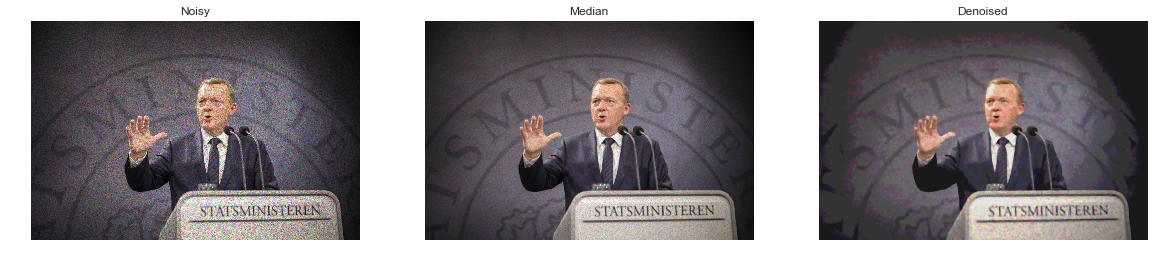

In [246]:
from skimage.filters.rank import median

f, axarr = plt.subplots(1, 3, figsize=(20, 20))

axarr[0].imshow(noisy_lars)
axarr[0].set_title("Noisy")

axarr[1].imshow(np.dstack([median(x) for x in [r, g, b]]))
axarr[1].set_title("Median")

axarr[2].imshow(reconstruction)
axarr[2].set_title("Denoised")

for i in range(3):
    axarr[i].grid(False)
    axarr[i].axis("off")